## Survival curves for relative subtype proportions
Figure 3B-C, Extended Figure 3B-F, Supplementary Figure 3 E-F

 - Author: CW 
 - files needed: Supplementary_Table_1.csv, 
 - Last updated: 04/10/24

Reference: https://www.emilyzabor.com/tutorials/survival_analysis_in_r_tutorial.html

In [14]:
library(survival)
library(dplyr)
library(ggsurvfit)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



In [15]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.0   ggsurvfit_1.0.0 dplyr_1.1.4     survival_3.5-8 

loaded via a namespace (and not attached):
 [1] pillar_1.9.0     compiler_4.2.3   base64enc_0.1-3  tools_4.2.3     
 [5] digest_0.6.35    uuid_1.2-0       jsonlite_1.8.8   evaluate_0.23   
 [9] lifecycle_1.0.4  

## Load data

In [16]:
clinical_df <- read.csv('/home/cbw3/data/figure_generation/Supplementary_Tables/Supplementary_Table_1/Supplementary_Table_1.csv', row.names = "X")

In [17]:
head(clinical_df)

,sample_ID_long,patient,uid,age,sex,subtype,sample_date,treatment,treatment_group,adjuvant,⋯,day_to_treatment,overall_response,response_short,with_ICI,ICI_only,mDC_out_of_cDC,is_mDC_high,mDC_status,patient_sample,ATAC_sample_ID
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
1,D18-11807,946,94610/24/2018,85,M,cutaneous,10/24/18,"ERKi (prior pembro, PDL1+CSF1Ri)",targeted,FALSE,⋯,-112,PR,R,no,no,0.00000000,0,low,946_1,none
2,D18-11808,926,92611/01/2018,62,M,cutaneous,11/1/18,pembro,ICI_PD1,FALSE,⋯,22,PD,NR,yes,yes,0.18478261,0,low,926_1,none
3,D18-11809,406,40611/05/2018,70,M,cutaneous,11/5/18,"pembro (prior TVEC, d+t, IFN)",ICI_PD1,FALSE,⋯,-3,PD,NR,yes,yes,0.16438356,0,low,406_3,none
4,D19-11960,1224,122408/29/2019,79,M,cutaneous,8/29/19,pembro,ICI_PD1,FALSE,⋯,71,PD,NR,yes,yes,0.00000000,0,low,1224_3,D19-11983 D19-11984
5,D19-11962,1098,109809/16/2019,24,F,cutaneous,9/16/19,"enco+Bini (+ NIVO, prior IPI+NIVO, enco+bini)",targeted_plus_ICI,FALSE,⋯,19,R,R,yes,no,0.20833333,1,high,1098_5,none
6,D19-11963,1232,123209/13/2019,79,F,mucosal,9/13/19,pembro +PCV,other_plus_ICI,FALSE,⋯,-47,R,R,yes,no,0.02702703,0,low,1232_1,none


In [18]:
## exclude patient sample 1122_1
mDC_samples_clinical <- clinical_df[clinical_df$patient_sample != '1122_1',]

# Survival curve on all samples

In [19]:
#Plotting function
plot_survival <- function(fit, type_of_surv, title, proportion) {
     
    if(type_of_surv== 'pfs') {
        x = 800
        y = 0.02
    }
    else {
        x= 1500
        y = 0.45
    }
    
    fit %>% ggsurvfit() +
  labs(
    x = paste0(type_of_surv,", days"),
    y = "survival probability",
  title = title) + 
       add_legend_title(proportion) +
  add_confidence_interval() +
  add_risktable(size = 4) +  
      add_pvalue("annotation", x = x, y = y, size = 5) +  #change x and y 
      theme(panel.background = element_blank(), panel.border = element_blank(),
      panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"), 
        legend.position = "right", 
        text = element_text(size = 12)) 
#, axis.line = element_line(colour = "black"),
 }


## Survival curves of ICI only samples split by mDC/cDC proportion - Figure 3B

In [20]:
ICI_only_mDC_samples <- mDC_samples_clinical[mDC_samples_clinical$ICI_only == 'yes',]

### 1. PFS

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”


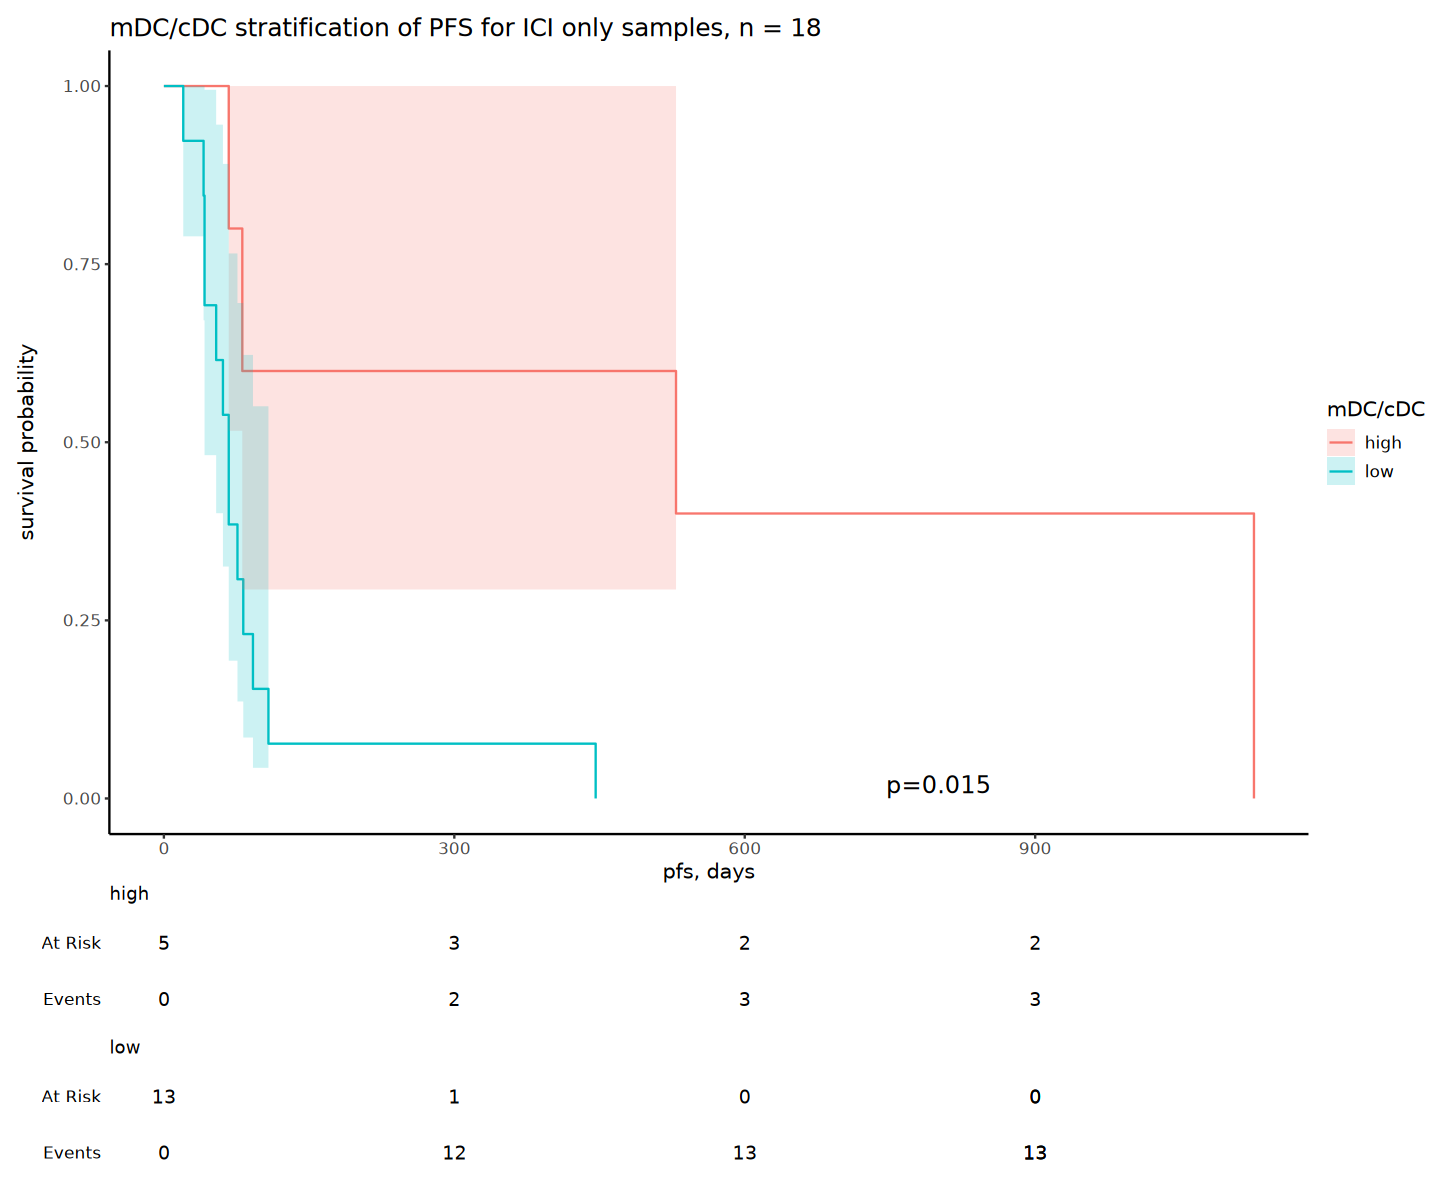

In [21]:
pfs_fit_2 <- survfit2(
  Surv(pfs, censure_pfs) ~ mDC_status,
  data = ICI_only_mDC_samples) 

title = "mDC/cDC stratification of PFS for ICI only samples, n = 18"

options(repr.plot.width = 12, repr.plot.height = 10)
plot_survival(pfs_fit_2, 'pfs', title, 'mDC/cDC')

### 2. OS

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


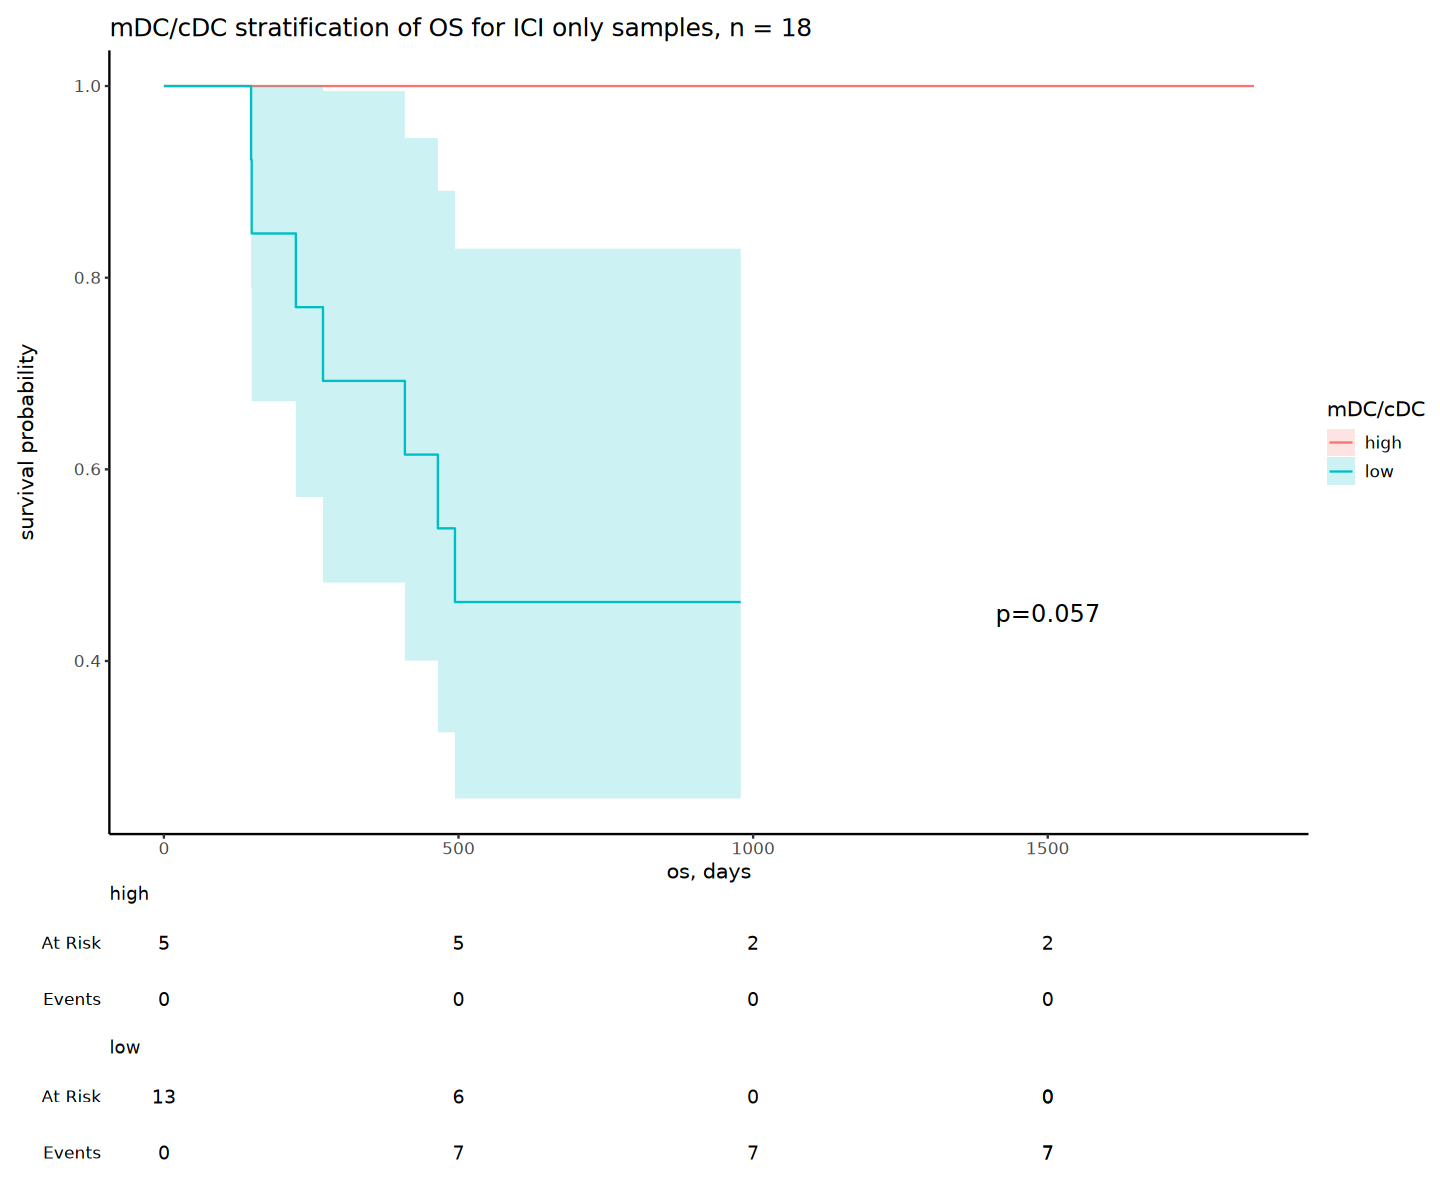

In [22]:
os_fit_2 <- survfit2(
  Surv(os, censure_os) ~ mDC_status,
  data = ICI_only_mDC_samples) 

title = "mDC/cDC stratification of OS for ICI only samples, n = 18"

plot_survival(os_fit_2, 'os', title, 'mDC/cDC')

## Survival curves of samples with ICI split by mDC/cDC proportion - Extended Figure 3B

In [23]:
with_ICI_mDC_samples <- mDC_samples_clinical[mDC_samples_clinical$with_ICI == 'yes',]

### 1. PFS

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 27 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 27 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 27 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 27 rows.
ℹ Did you mean to use `annotate()`?”


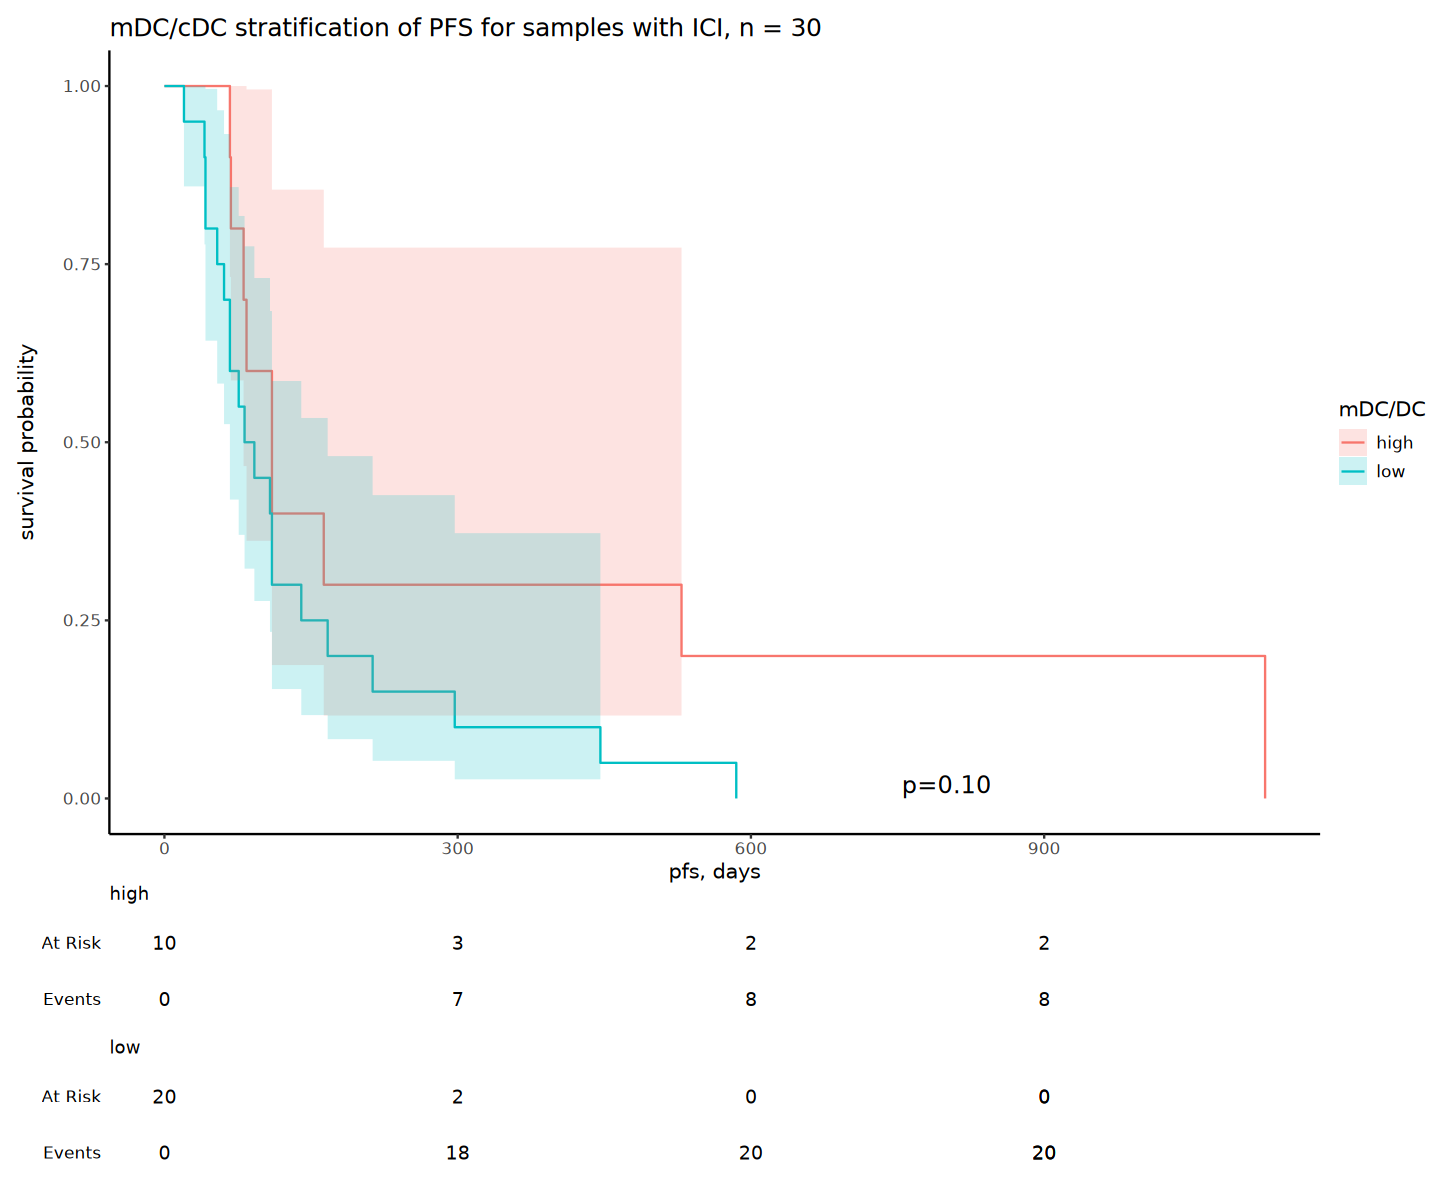

In [24]:
pfs_fit <- survfit2(
  Surv(pfs, censure_pfs) ~ mDC_status,
  data = with_ICI_mDC_samples) 

title = "mDC/cDC stratification of PFS for samples with ICI, n = 30"
plot_survival(pfs_fit, 'pfs', title, 'mDC/DC')

### 2. OS

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 28 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 28 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 28 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 28 rows.
ℹ Did you mean to use `annotate()`?”


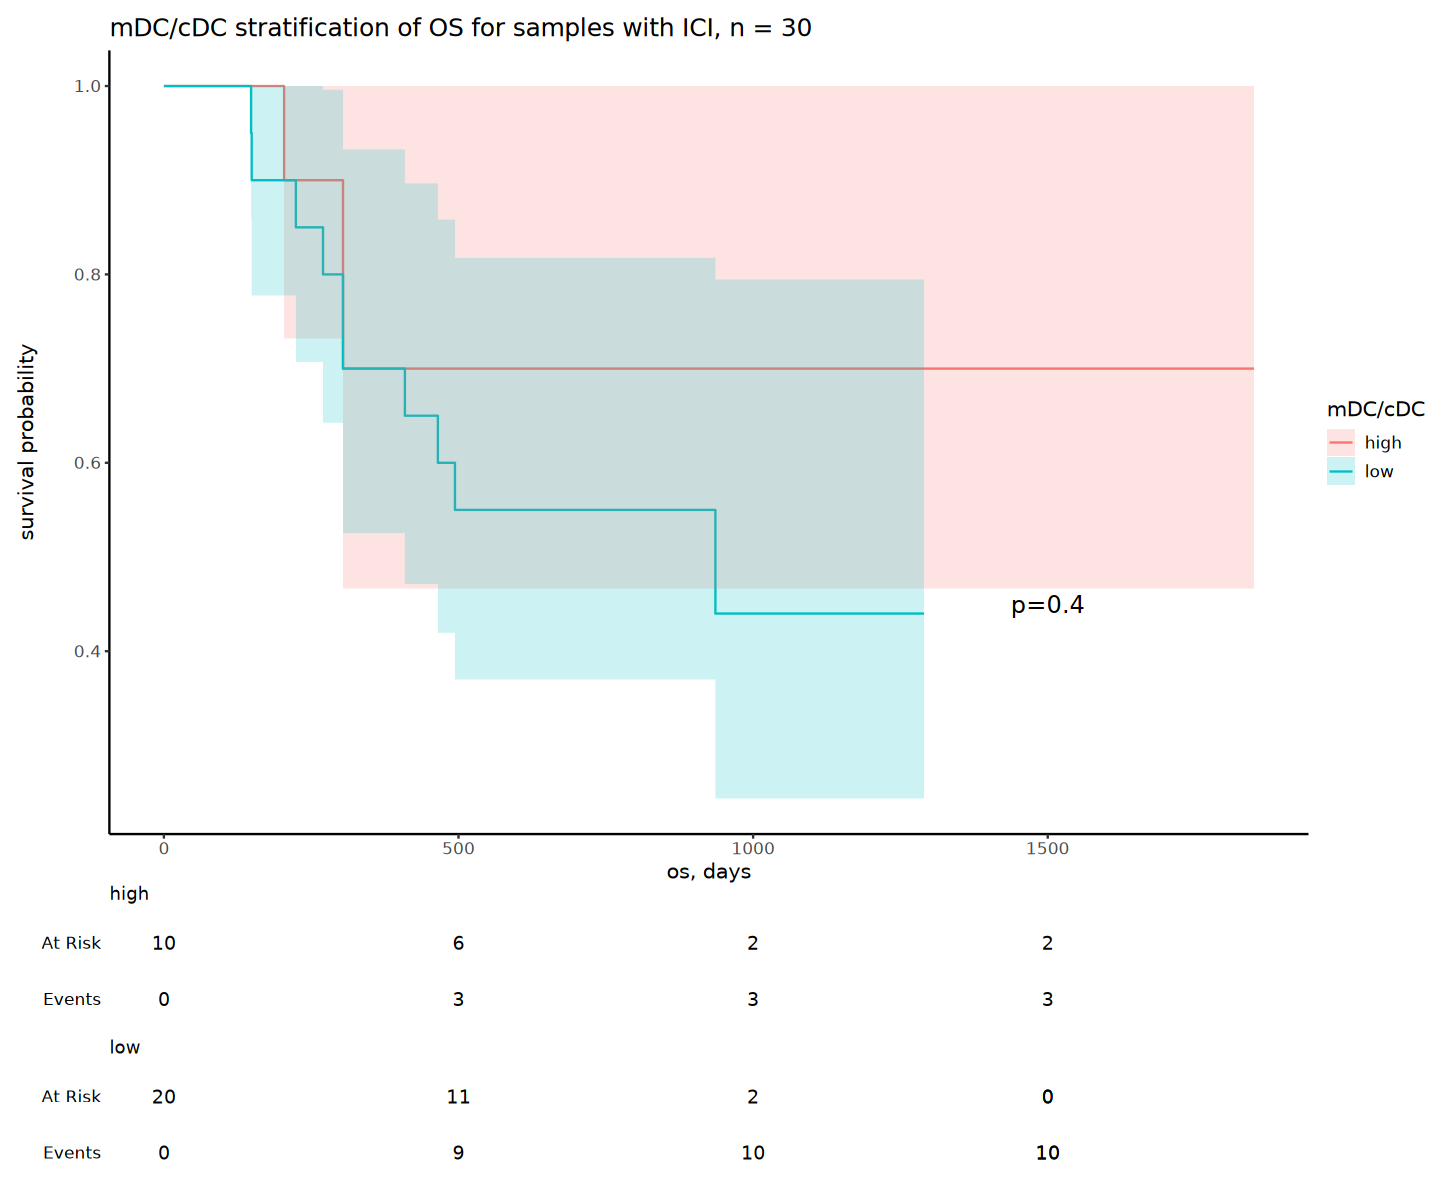

In [25]:
os_fit <- survfit2(
  Surv(os, censure_os) ~ mDC_status,
  data = with_ICI_mDC_samples) 

title = "mDC/cDC stratification of OS for samples with ICI, n = 30"
plot_survival(os_fit, 'os', title, 'mDC/cDC')

## Survival curves of all samples split by mDC/cDC proportion - Extended Figure 3C

### 1. PFS

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 33 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 33 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 33 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 33 rows.
ℹ Did you mean to use `annotate()`?”


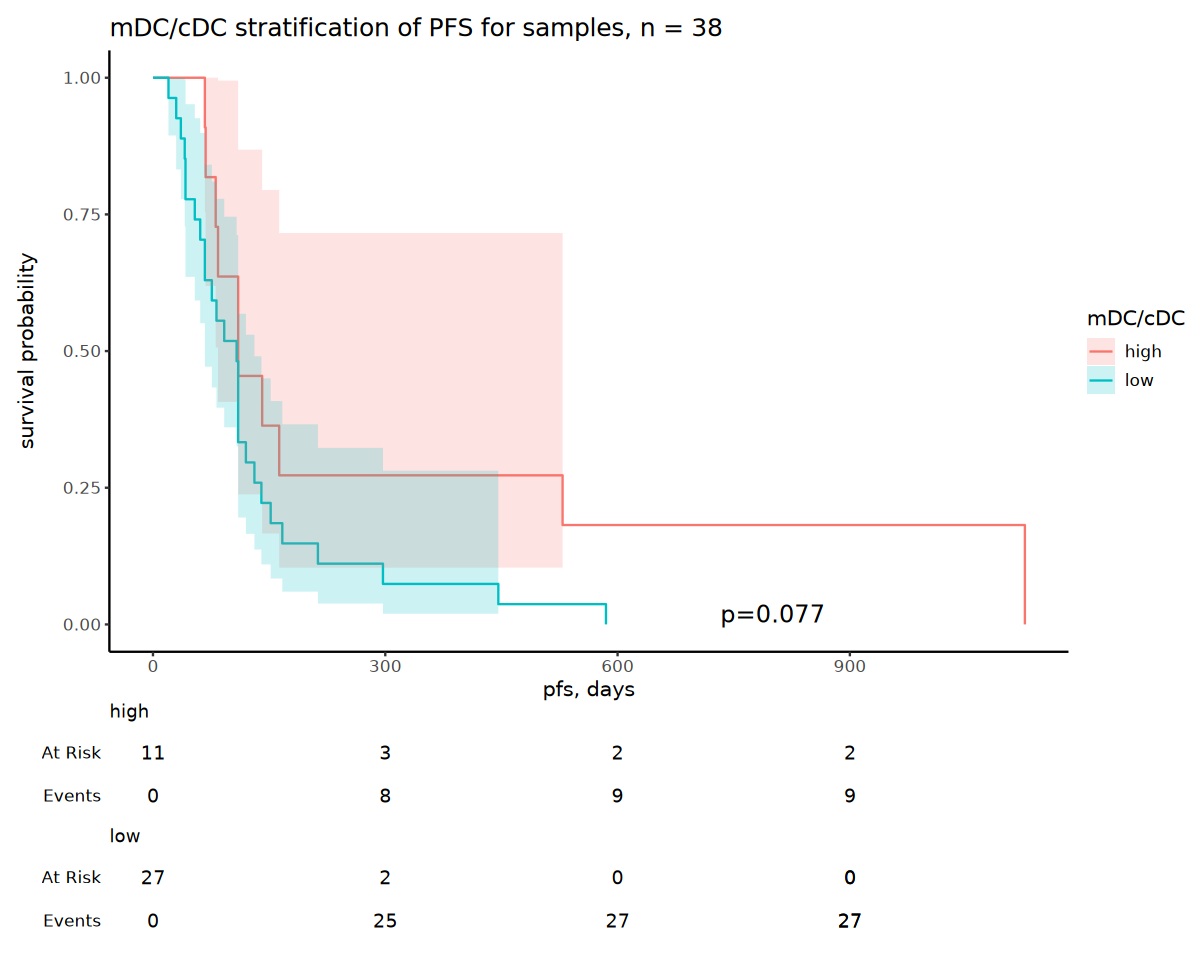

In [26]:
pfs_fit <- survfit2(
  Surv(pfs, censure_pfs) ~ mDC_status,
  data = mDC_samples_clinical) 

options(repr.plot.height = 8, repr.plot.width=10)

plot_survival(pfs_fit, 'pfs', "mDC/cDC stratification of PFS for samples, n = 38", 'mDC/cDC')

### 2. OS

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 35 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 35 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 35 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 35 rows.
ℹ Did you mean to use `annotate()`?”


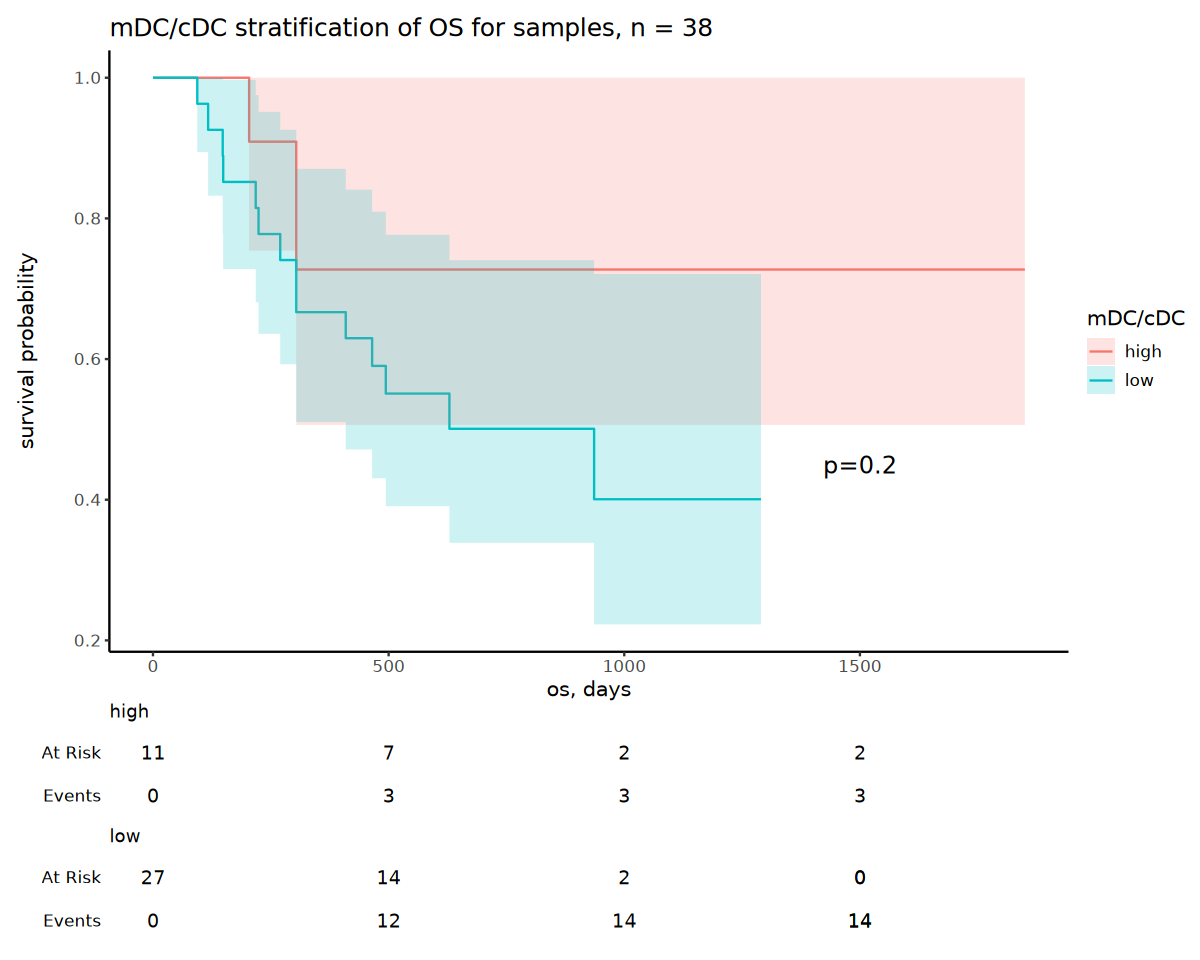

In [27]:
os_fit <- survfit2(
  Surv(os, censure_os) ~ mDC_status,
  data = mDC_samples_clinical) 

options(repr.plot.height = 8, repr.plot.width=10)

plot_survival(os_fit, 'os', "mDC/cDC stratification of OS for samples, n = 38", 
             'mDC/cDC')

## Survival curves (PFS) for other subtype proportions: classical monocyte, Macrophage M2, Tumor - respiration - 
rationale: see if there is a significant different in the proportions of these cell types, which are significant by response 

In [ ]:
#exclude patient 1122_1

In [28]:
#select all subtypes we're interested in 
subtype_props <- read.csv('./clinical_var_analysis/cohort_relative_subtype_proportions.csv', 
                         check.names = FALSE)

rownames(subtype_props) <- subtype_props[,1]
subtype_props[,1] <- NULL

cellprop_names <- c('Monocyte classical/Monocyte/Macrophage', 'Macrophage M2/Monocyte/Macrophage', 
               'Tumor - Respiration/Tumor')

cellprops <- data.frame((t(subtype_props[rownames(subtype_props) %in% cellprop_names,])))

cellprops$patient_sample <- rownames(cellprops) 
cellprops <- cellprops[cellprops$patient_sample != '1122_1',]

In [29]:
all_samples_df <- merge(cellprops, clinical_df, by='patient_sample')

#### cutoffs for low/high:
1. Classical monocytes: 0.121
2. M2 Macrophage: 0.31
3. Tumor respiration: 0.121

In [30]:
median(all_samples_df$Monocyte.classical.Monocyte.Macrophage)
median(all_samples_df$Macrophage.M2.Monocyte.Macrophage)
median(all_samples_df[!is.na(all_samples_df$Tumor...Respiration.Tumor),]$Tumor...Respiration.Tumor)

[1] 0.1206326

[1] 0.311635

[1] 0.1205087

In [31]:
all_samples_df$m.c.high <- ifelse(all_samples_df$Monocyte.classical.Monocyte.Macrophage > 0.121, 1, 0)
all_samples_df$m2.high <- ifelse(all_samples_df$Macrophage.M2.Monocyte.Macrophage > 0.31, 1, 0)
all_samples_df$t.r.high <- ifelse(all_samples_df$Tumor...Respiration.Tumor > 0.121, 1, 0)

## 1. all samples

In [ ]:
#exlclude patient 1122_1

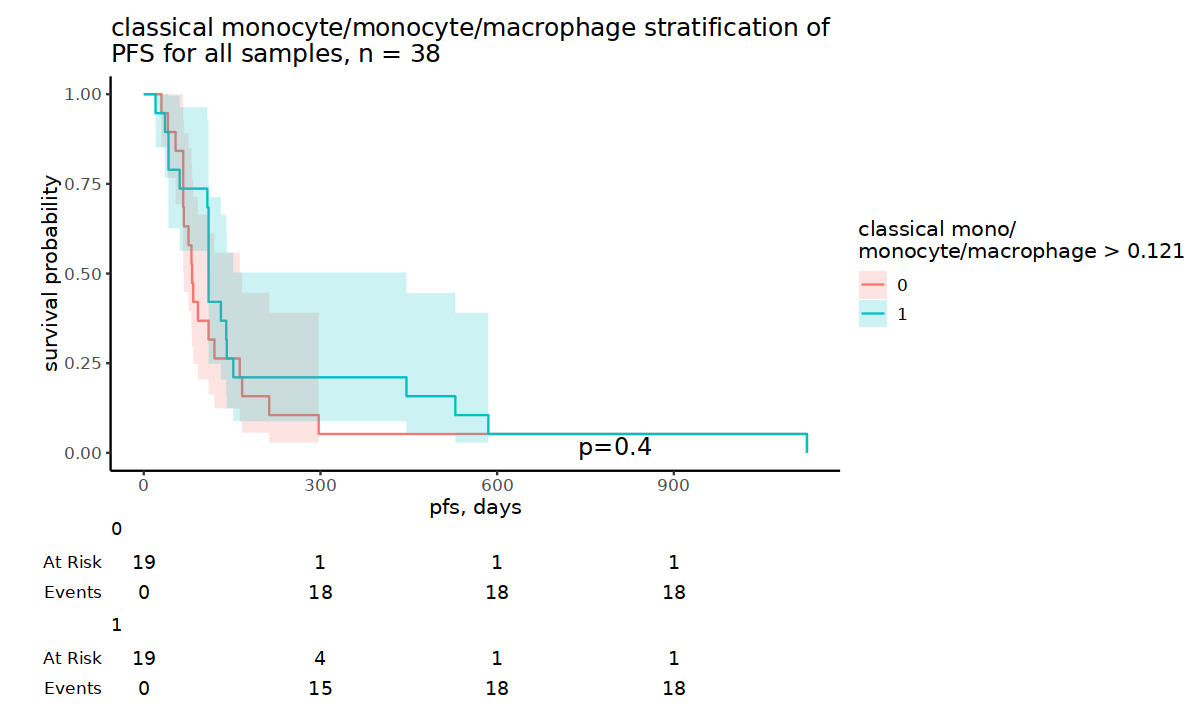

In [17]:
pfs_fit <- survfit2(
  Surv(pfs, censure_pfs) ~ m.c.high,
  data = all_samples_df) 

title = "classical monocyte/monocyte/macrophage stratification of \nPFS for all samples, n = 38"

options(repr.plot.width = 10, repr.plot.height = 6)
plot_survival(pfs_fit, 'pfs', title, 'classical monocyte/\nmonocyte/macrophage > 0.121')

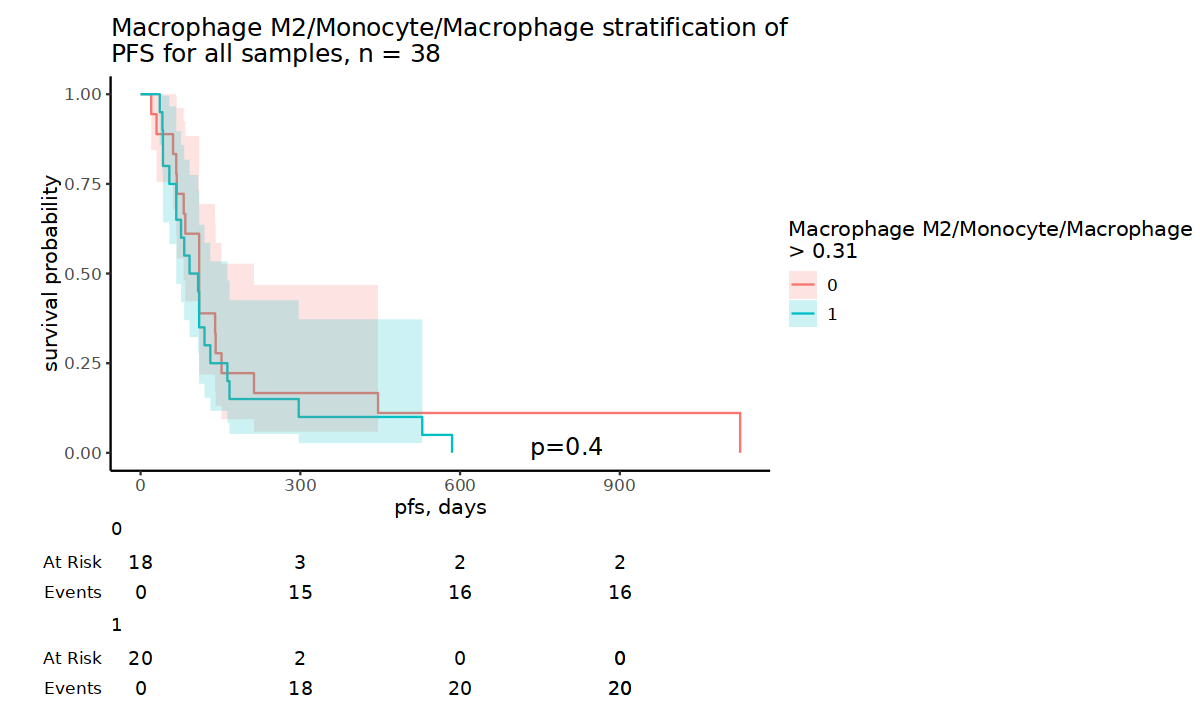

In [18]:
pfs_fit <- survfit2(
  Surv(pfs, censure_pfs) ~ m2.high,
  data = all_samples_df) 

title = paste0(cellprop_names[2], " stratification of \nPFS for all samples, n = 38")

options(repr.plot.width = 10, repr.plot.height = 6)
plot_survival(pfs_fit, 'pfs', title, paste0(cellprop_names[2], '\n> 0.31'))

ggsave('/home/cbw3/data/figure_generation/Figure3/ExtF3/ExtF3_M2_mono_macro_survival_curve.pdf', width = 7, height = 5)

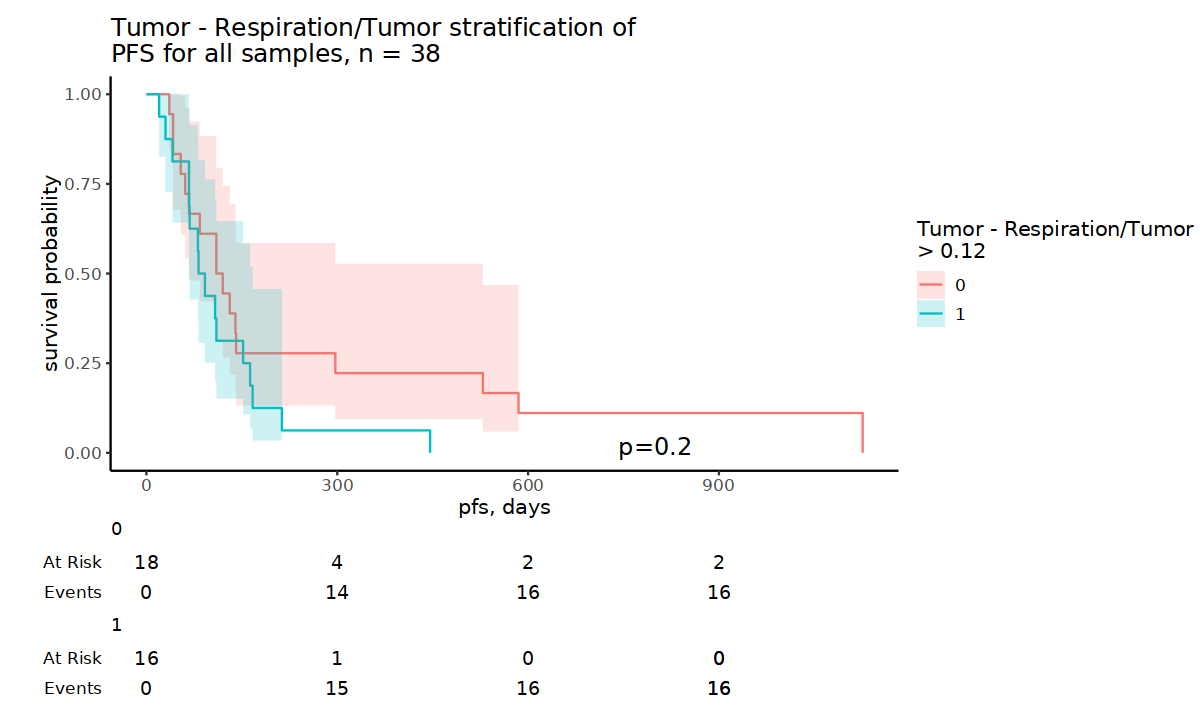

In [19]:
pfs_fit <- survfit2(
  Surv(pfs, censure_pfs) ~ t.r.high,
  data = all_samples_df) 

title = paste0(cellprop_names[3], " stratification of \nPFS for all samples, n = 38")

options(repr.plot.width = 10, repr.plot.height = 6)
plot_survival(pfs_fit, 'pfs', title, paste0(cellprop_names[3], '\n> 0.12'))

ggsave('/home/cbw3/data/figure_generation/Figure3/ExtF3/ExtF3B_OS_survival_curve_ICI_only.pdf', width = 7, height = 5)

## 2. ICI only - Supplementary Figure 3E

In [43]:
all_samples_ICI_only_df <- all_samples_df[all_samples_df$ICI_only == 'yes', ]

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”


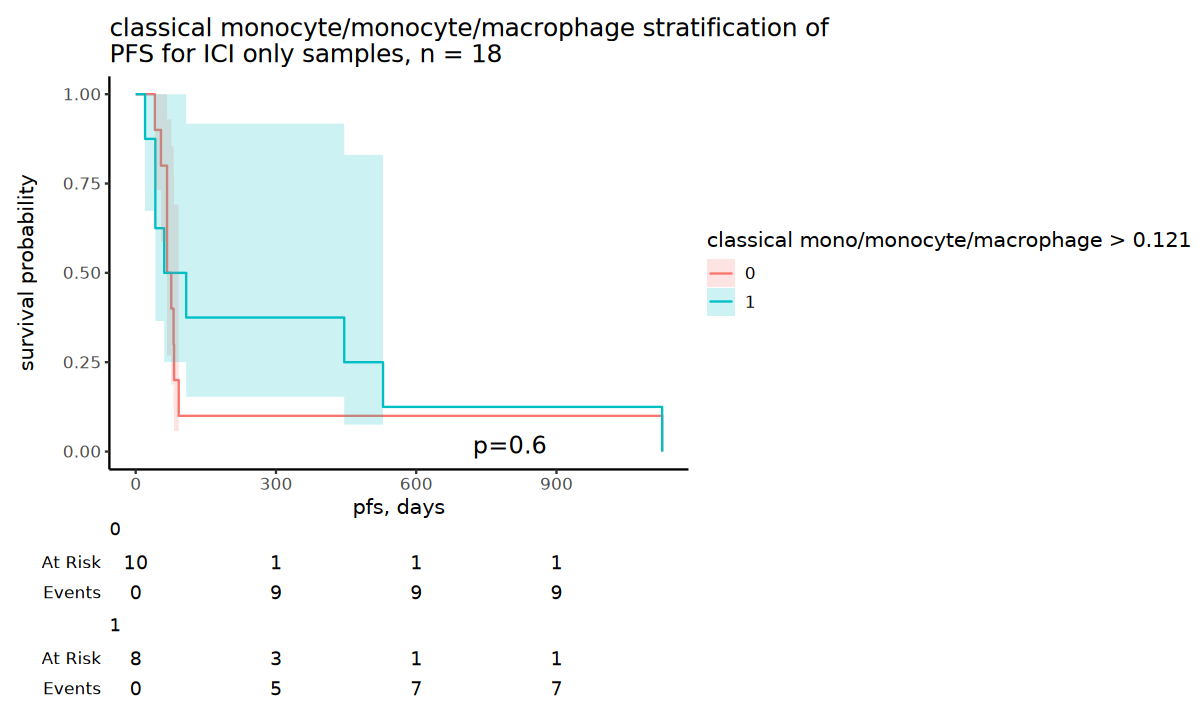

In [44]:
#Monocyte classical 
pfs_fit <- survfit2(
  Surv(pfs, censure_pfs) ~ m.c.high,
  data = all_samples_ICI_only_df) 

title = "classical monocyte/monocyte/macrophage stratification of \nPFS for ICI only samples, n = 18"

options(repr.plot.width = 10, repr.plot.height = 6)
plot_survival(pfs_fit, 'pfs', title, 'classical mono/monocyte/macrophage > 0.121')

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”


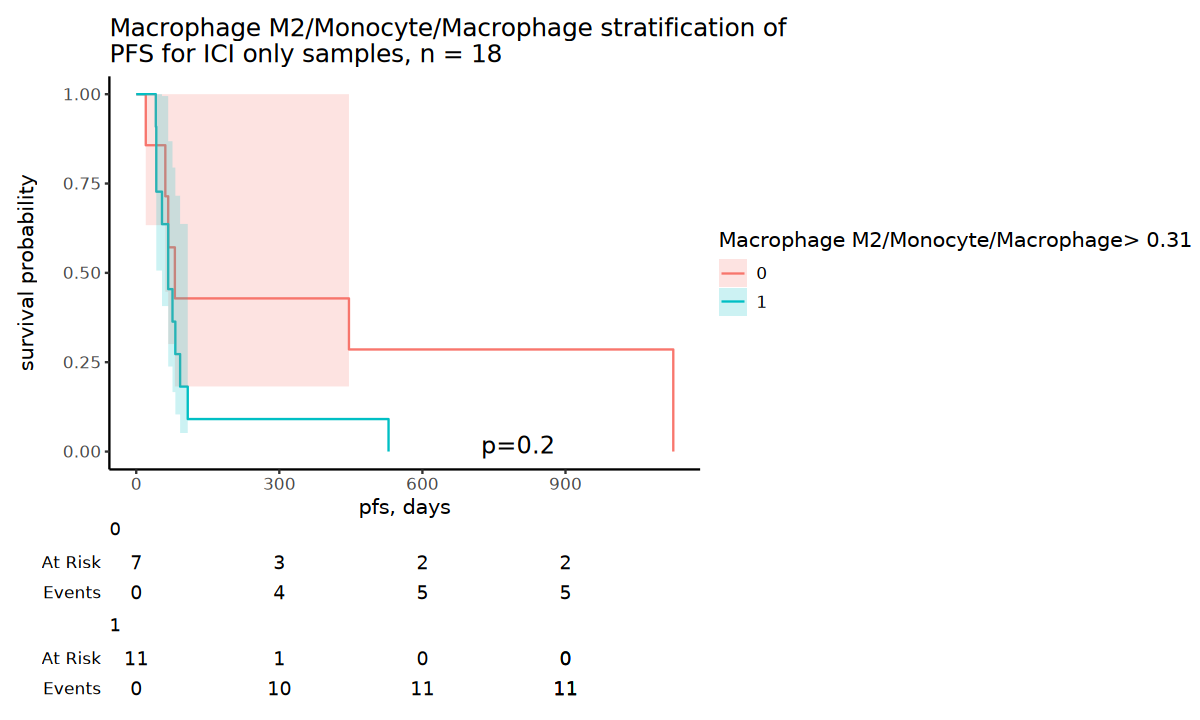

In [45]:
pfs_fit <- survfit2(
  Surv(pfs, censure_pfs) ~ m2.high,
  data = all_samples_ICI_only_df) 

title = paste0(cellprop_names[2], " stratification of \nPFS for ICI only samples, n = 18")


options(repr.plot.width = 10, repr.plot.height = 6)
plot_survival(pfs_fit, 'pfs', title, paste0(cellprop_names[2], '> 0.31'))

Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 16 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 16 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 16 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in ggplot2::geom_blank():
“All aesthetics have length 1, but the data has 16 rows.
ℹ Did you mean to use `annotate()`?”


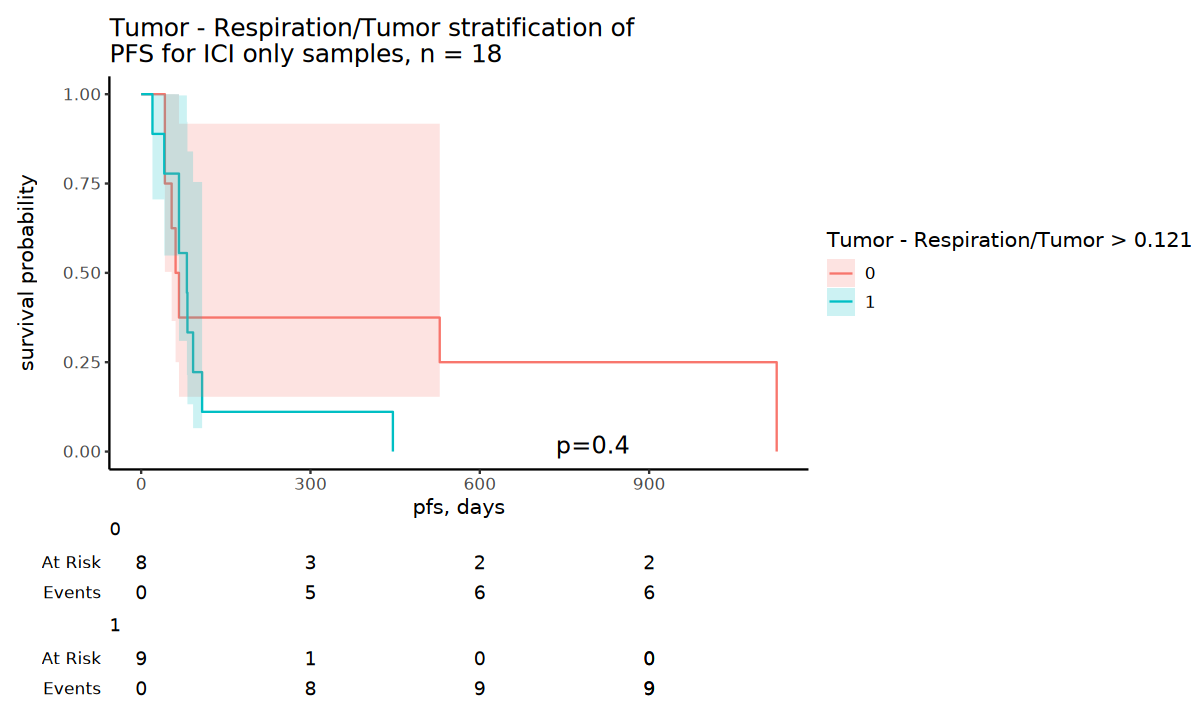

In [46]:
pfs_fit <- survfit2(
  Surv(pfs, censure_pfs) ~ t.r.high,
  data = all_samples_ICI_only_df) 

title = paste0(cellprop_names[3], " stratification of \nPFS for ICI only samples, n = 18")

options(repr.plot.width = 10, repr.plot.height = 6)
plot_survival(pfs_fit, 'pfs', title, paste0(cellprop_names[3], ' > 0.121'))